# Linear Regression

## Step 1: Load the Diabetes dataset

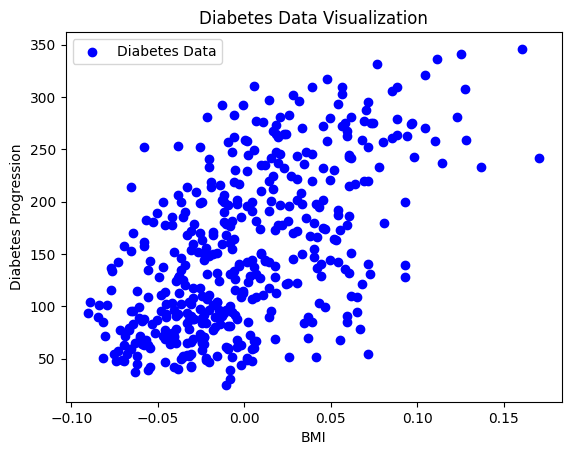

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# Step 1: Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:, 2:3]  # Selecting a single feature (e.g., 'BMI')
y = diabetes.target.reshape(-1, 1)

# Plot the data points
plt.scatter(X, y, label="Diabetes Data", color='b')
plt.xlabel("BMI")
plt.ylabel("Diabetes Progression")
plt.title("Diabetes Data Visualization")
plt.legend()
plt.show()

## Step 2: Implement the gradient of the in-sample error function for linear regression


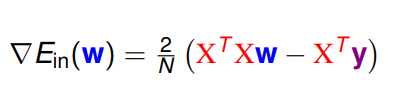

In [ ]:
# Step 2: Implement the gradient of the in-sample error function for linear regression.

def in_sample_grad(X, y, w):
  N = len(X)

  t = np.matmul(X.T, X)
  #t = np.append(1, t)
  return (2 / N) * ( np.matmul(t, w[1]) - np.matmul(X.T, y ) )


## Step 3: Implement NumPy routine to find the optimal solutions and, i.e., fit the model on the dataset and predict the outcomes.

In [ ]:
import numpy as np

class CustLinearRegression:

    def __init__(self):
        self.w_lin = np.array([[1, 0.0]])
        self.fitted = False

    def fit(self, X, y):
        # append 1 in the beginning
        X = np.insert(X.T, 0, 1, axis=0)

        # calculate pseudo-inverse
        X_inverse = np.matmul(np.linalg.pinv(np.matmul(X, X.T)), X)

        # get solution
        self.w_lin = np.matmul(X_inverse, y)

        self.fitted = True
        return self.w_lin

    def predict(self, X):
        assert self.fitted, "first fit the model!"

        # append 1 in the beginning
        X = np.insert(X.T, 0, 1, axis=0)

        # get the predicted y
        y_pred = np.dot(self.w_lin.T, X)
        return y_pred[0]

Fit and save the model weights

In [ ]:
model = CustLinearRegression()
w_lin = model.fit(X,y)

## Step 4: Plot the regression line against the data points to visualize the fit.

<ipython-input-97-8fe95a3edabe>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xd, yd, 'k', lw=2, ls='-', color='r')


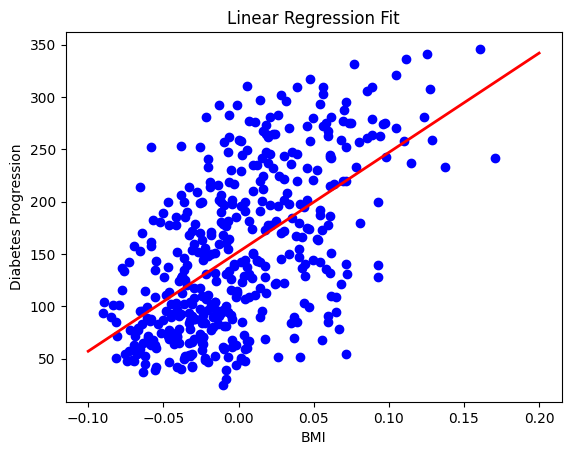

In [ ]:
# Step 4: Plot the regression line against the data points to visualize the fit.
# Building the model

# Calculate the intercept and gradient of the decision boundary.
c = w_lin[0]
m = w_lin[1]


xd = np.array([-0.10, 0.2])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=2, ls='-', color='r')

plt.scatter(X, y, color='b')

plt.xlabel("BMI")
plt.ylabel("Diabetes Progression")
plt.title("Linear Regression Fit")
plt.show()


## Step 5: Compare the performance with Python libraries such as Scikit-learn.


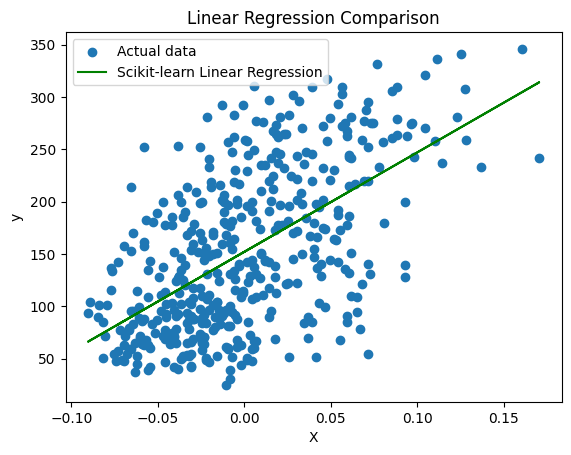

Mean Squared Error (MSE) of Custom: 3890.4565854612724
Mean Squared Error (MSE) of Sklearn:  3890.456585461273


In [ ]:
from sklearn.metrics import mean_squared_error


# Train a Linear Regression model from scikit-learn
lr = LinearRegression()
lr.fit(X, y)

# Make predictions using scikit-learn model
y_pred_sklearn = lr.predict(X)

plt.scatter(X, y, label="Actual data")
plt.plot(X, y_pred_sklearn, "g-", label="Scikit-learn Linear Regression")


plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Comparison")
plt.legend()
plt.show()

custom_pred = model.predict(X).tolist()
sck_pred = lr.predict(X).tolist()
print("Mean Squared Error (MSE) of Custom:", mean_squared_error(y, custom_pred))
print("Mean Squared Error (MSE) of Sklearn: ", mean_squared_error(y, sck_pred))
